# ITSLIVE Glacier Velocities

In [1]:
import itslive
itslive.__version__

'0.1.2'

In [2]:
point = (-46.0, 70.1)
# cubes = itslive.cubes.find_by_bbox(-48.0,60.0,-45.1,70.0)
# cubes = itslive.cubes.find_by_polygon()


cubes = itslive.cubes.find([point])

cubes

[{'type': 'Feature',
  'geometry': {'type': 'Polygon',
   'coordinates': [[[-47.602562, 69.871451],
     [-45.0, 69.891805],
     [-45.0, 70.789059],
     [-47.726311, 70.767681],
     [-47.602562, 69.871451]]]},
  'properties': {'fill-opacity': -0.0012004801920768582,
   'fill': 'red',
   'roi_percent_coverage': 100.12004801920769,
   'geometry_epsg': {'type': 'Polygon',
    'coordinates': [[[-100000, -2200000],
      [0, -2200000],
      [0, -2100000],
      [-100000, -2100000],
      [-100000, -2200000]]]},
   'datacube_exist': 1,
   'zarr_url': 'http://its-live-data.s3.amazonaws.com/datacubes/v02/N70W040/ITS_LIVE_vel_EPSG3413_G0120_X-50000_Y-2150000.zarr',
   'epsg': 3413}}]

In [3]:
points=[(-47.1, 70.1),
        (-46.1, 71.2)]

velocities = itslive.cubes.get_time_series(points=points, variables=["v","vx", "vy"])

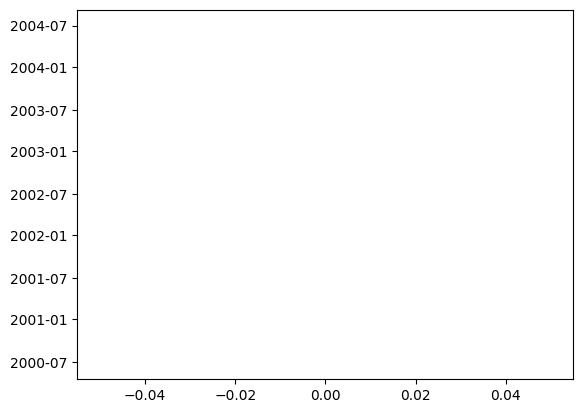

In [27]:
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np

lines = np.arange('2005-02-01', '2005-02-02', dtype='datetime64')

a=np.datetime64('2002-06-28').astype(datetime)
plt.plot(a)

In [63]:
series = velocities[0]["time_series"].v.to_pandas().dropna().sort_index()
series

mid_date
2013-03-28 14:56:11.569048064    104.0
2013-05-15 14:50:09.569046016     32.0
2013-06-24 14:50:08.569046016     56.0
2013-06-30 15:02:34.570046976    115.0
2013-07-10 14:50:17.069046016     92.0
                                 ...  
2022-04-23 03:03:13.069045760     38.0
2022-04-25 15:03:04.569046016    164.0
2022-04-25 15:03:07.069046016    172.0
2022-04-28 03:03:09.569046016     54.0
2022-04-28 03:03:12.069046016    123.0
Length: 4652, dtype: float32

In [70]:
[d. series.index.to_pydatetime()]

array([datetime.datetime(2013, 3, 28, 14, 56, 11, 569048),
       datetime.datetime(2013, 5, 15, 14, 50, 9, 569046),
       datetime.datetime(2013, 6, 24, 14, 50, 8, 569046), ...,
       datetime.datetime(2022, 4, 25, 15, 3, 7, 69046),
       datetime.datetime(2022, 4, 28, 3, 3, 9, 569046),
       datetime.datetime(2022, 4, 28, 3, 3, 12, 69046)], dtype=object)

<class 'numpy.datetime64'>
<class 'numpy.datetime64'>


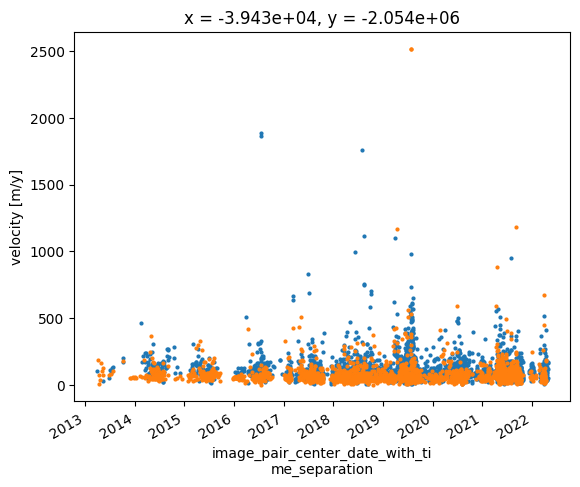

In [32]:
import matplotlib as mpl
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

np.all(np.diff(vel["time_series"].mid_date.values) >= 0)

color_index = 0
for vel in velocities:
    latitude = vel["coordinates"][1]
    longitude = vel["coordinates"][0]
    
    point_label = f"Lon: {longitude}, Lat: {latitude}"
    vel["time_series"].v.plot(ax=ax, linestyle="None", marker="o", markersize=2, c=plt.cm.tab10(color_index), label=point_label)
    color_index+=1